In [1]:
from pathlib import Path 
import logging
from datetime import datetime
from tqdm import tqdm

import numpy as np 
import torch
import torchvision.transforms.functional as tF
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import TensorDataset, Subset

from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity as LPIPS
from torchmetrics.functional import multiscale_structural_similarity_index_measure as mmssim
from torchvision.transforms import RandomCrop, Compose, ToPILImage, Resize, ToTensor, Lambda

from medical_diffusion.data.datamodules import SimpleDataModule
from medical_diffusion.data.datasets import NiftiPairImageGenerator
from medical_diffusion.models.embedders.latent_embedders import VQVAE,VQGAN
import argparse
import matplotlib.pyplot as plt

/home/local/PARTNERS/rh384/anaconda3/envs/n2n/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
inputfolder = "/home/local/PARTNERS/rh384/data/Task107_hecktor2021/labelsTest/"
targetfolder = "/home/local/PARTNERS/rh384/data/Task107_hecktor2021/imagesTest/"
input_size = 128
depth_size = 128
with_condition =  True

transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.transpose(3, 1)),
])

input_transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    # Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.transpose(3, 1)),
])


# ----------------Settings --------------
batch_size = 1
max_samples = None # set to None for all 
target_class = None # None for no specific class 
# path_out = Path.cwd()/'results'/'MSIvsMSS_2'/'metrics'
# path_out = Path.cwd()/'results'/'AIROGS'/'metrics'
path_out = Path.cwd()/'results'/'VQGAN'/'114k'
path_out.mkdir(parents=True, exist_ok=True)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# ----------------- Logging -----------
current_time = datetime.now().strftime("%Y_%m_%d_%H%M%S")
logger = logging.getLogger()
logging.basicConfig(level=logging.INFO)
logger.addHandler(logging.FileHandler(path_out/f'metrics_{current_time}.log', 'w'))

# ---------------- Dataset/Dataloader ----------------
dataset = NiftiPairImageGenerator(
    inputfolder,
    targetfolder,
    input_size=input_size,
    depth_size=depth_size,
    transform=input_transform if with_condition else transform,
    target_transform=transform,
    full_channel_mask=True
)


dl = DataLoader(dataset, batch_size = 1, shuffle=True, num_workers=4, pin_memory=True)

In [3]:
model = VQGAN.load_from_checkpoint("/home/local/PARTNERS/rh384/runs/VQGAN/2024_01_07_090227/epoch=284-step=114000.ckpt")
model.to(device)



Setting up [baseline] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/home/local/PARTNERS/rh384/anaconda3/envs/n2n/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/local/PARTNERS/rh384/anaconda3/envs/n2n/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VQGAN(
  (pixel_loss_fct): L1Loss()
  (vqvae): VQVAE(
    (loss_fct): L1Loss()
    (perceiver): LPIPS(
      (loss_fn): LPIPS(
        (scaling_layer): ScalingLayer()
        (net): vgg16(
          (slice1): Sequential(
            (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): ReLU(inplace=True)
            (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (3): ReLU(inplace=True)
          )
          (slice2): Sequential(
            (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (6): ReLU(inplace=True)
            (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (8): ReLU(inplace=True)
          )
          (slice3): Sequential(
            (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            (10): Conv2d(128,

tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0003, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0004, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-0.9999, device='cuda:0')
tensor(0.0006, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0009, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0002, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0008, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0004, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0006, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0005, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0007, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0006, device='cuda:0')


/tmp/ipykernel_452300/46319725.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=1, ncols=3)


tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0007, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0006, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0011, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-0.9999, device='cuda:0')
tensor(0.0006, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0006, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0012, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0015, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0003, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-0.9998, device='cuda:0')
tensor(0.0005, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0004, device='cuda:0')
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')
tensor(0.0046, device='cuda:0')
tensor(1., de

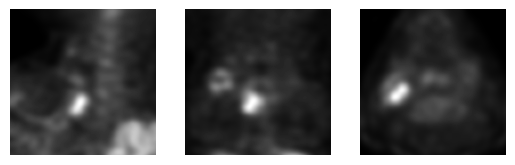

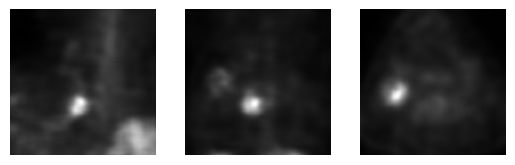

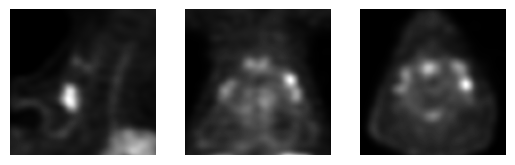

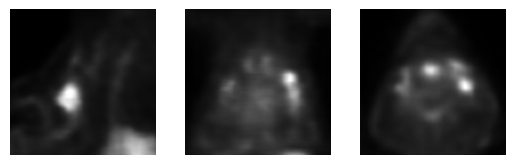

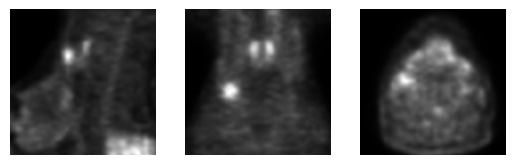

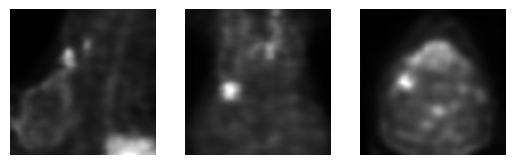

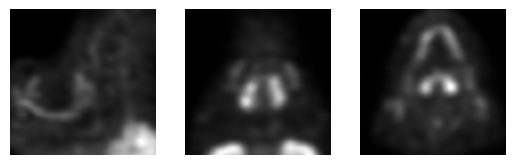

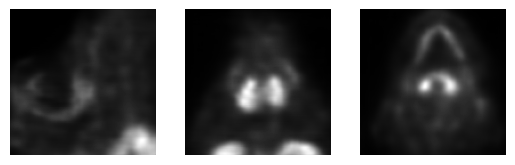

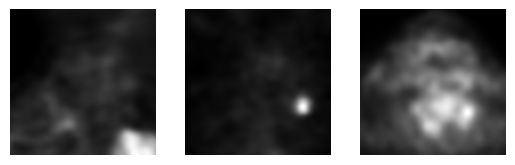

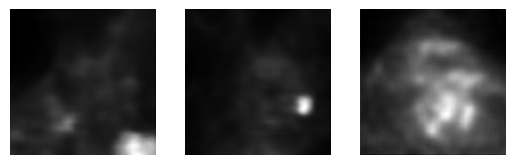

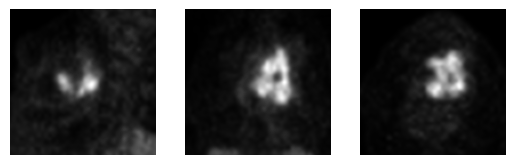

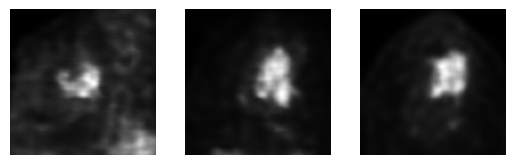

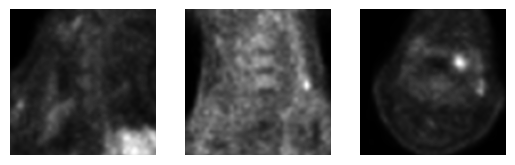

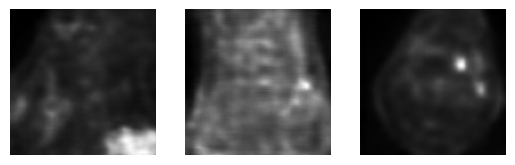

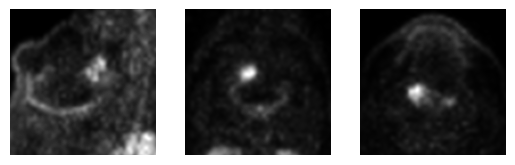

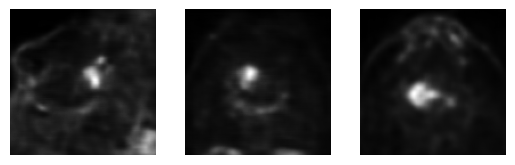

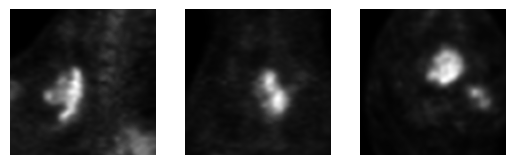

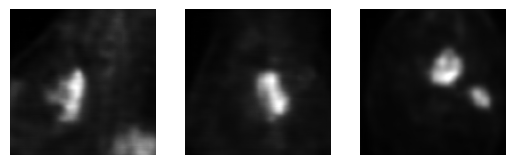

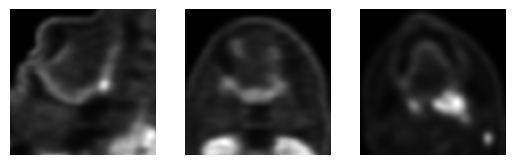

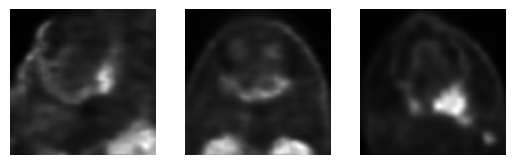

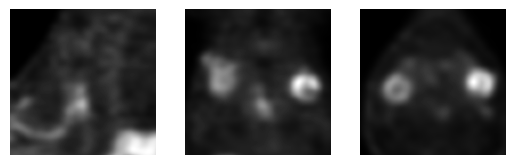

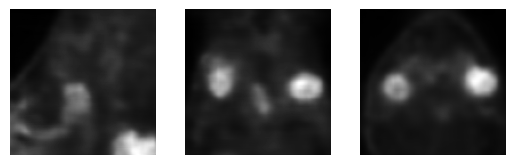

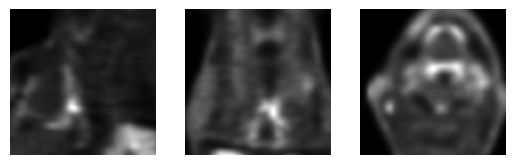

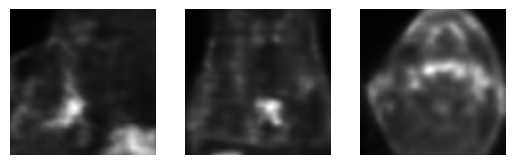

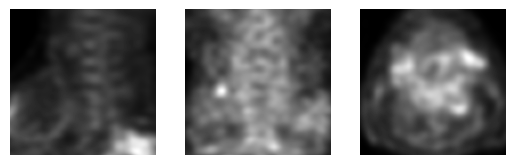

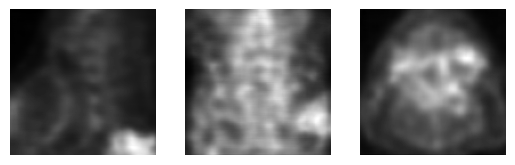

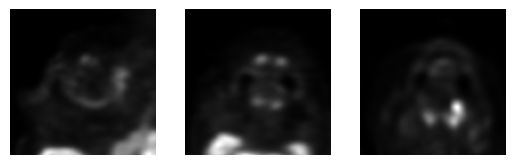

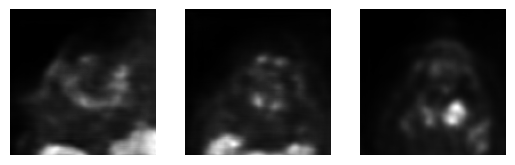

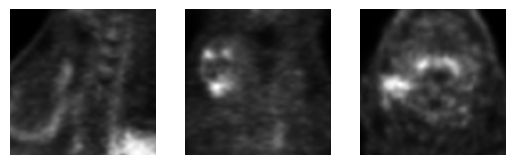

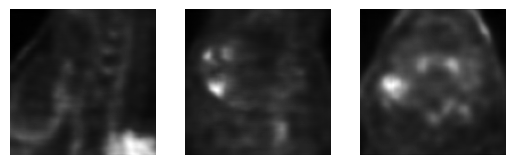

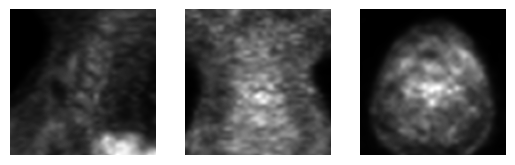

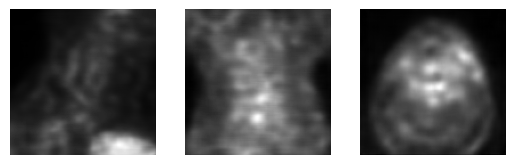

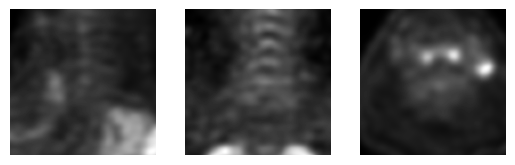

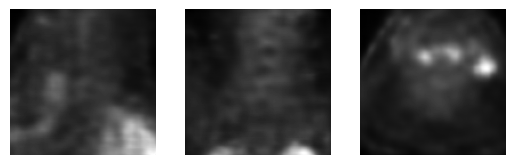

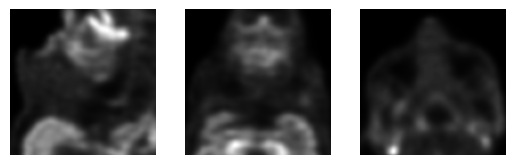

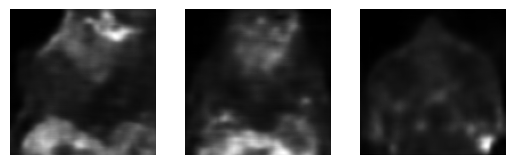

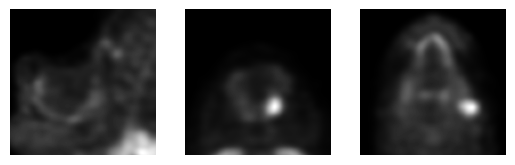

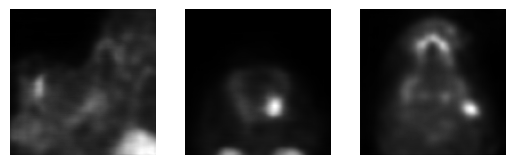

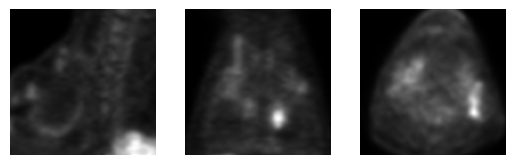

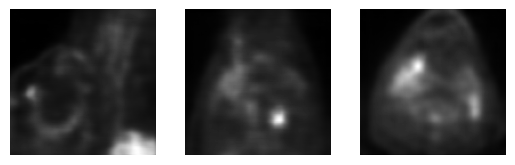

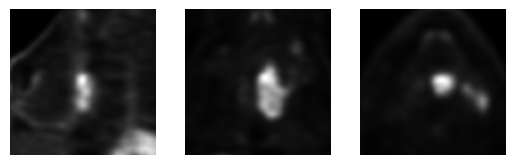

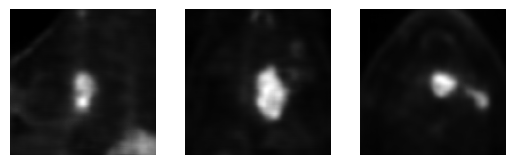

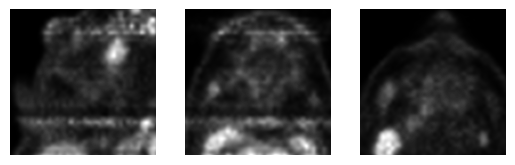

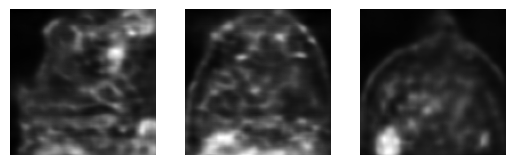

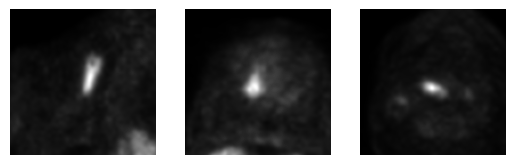

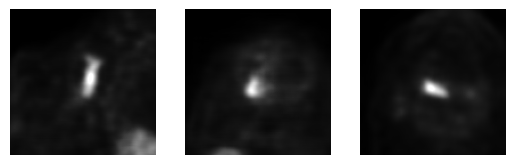

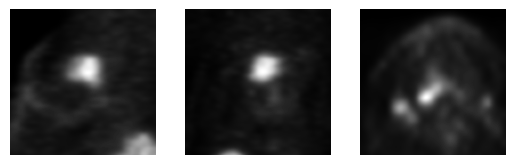

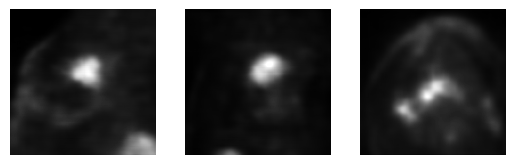

In [4]:
import nibabel as nib
for i, real_batch in enumerate(dl):

    # real_batch = next(iter(dl))
    imgs_real_batch = real_batch['target'].to(device)
    print(imgs_real_batch.max())
    print(imgs_real_batch.min())
    with torch.no_grad():
        imgs_fake_batch = model(imgs_real_batch)[0].clamp(-1, 1)   

    img_real, img_fake = (imgs_real_batch + 1) / 2, (imgs_fake_batch + 1) / 2  # [-1, 1] -> [0, 1]
    print(torch.mean(torch.square(img_real-img_fake)))
    # print(mmssim(img_real, img_fake, normalize='relu'))

    target_img1 = img_real.squeeze(0).squeeze(0).detach().cpu().numpy()
    nifti_img_t = nib.Nifti1Image(target_img1, affine = np.eye(4))
    # nib.save(nifti_img_t, path_out/f'target_{i}.nii.gz')  
    
    fake_img1 = img_fake.squeeze(0).squeeze(0).detach().cpu().numpy()
    nifti_img_t = nib.Nifti1Image(fake_img1, affine = np.eye(4))
    # nib.save(nifti_img_t, path_out/f'fake_{i}.nii.gz')  


    img = img_real[0, 0,:,:,:]
    fake = img_fake[0, 0,:,:,:]

    img = img.cpu().numpy()
    fake = fake.cpu().numpy()
    fig, axs = plt.subplots(nrows=1, ncols=3)
    for ax in axs:
        ax.axis("off")
    ax = axs[0]
    ax.imshow(img[..., img.shape[2] // 2], cmap="gray")
    ax = axs[1]
    ax.imshow(img[:, img.shape[1] // 2, ...], cmap="gray")
    ax = axs[2]
    ax.imshow(img[img.shape[0] // 2, ...], cmap="gray")

    fig, axs = plt.subplots(nrows=1, ncols=3)
    for ax in axs:
        ax.axis("off")
    ax = axs[0]
    ax.imshow(fake[..., fake.shape[2] // 2], cmap="gray")
    ax = axs[1]
    ax.imshow(fake[:, fake.shape[1] // 2, ...], cmap="gray")
    ax = axs[2]
    ax.imshow(fake[fake.shape[0] // 2, ...], cmap="gray")

In [5]:
for img_real, img_fake in zip(imgs_real_batch, imgs_fake_batch):
        img_real, img_fake = (img_real+1)/2, (img_fake+1)/2  # [-1, 1] -> [0, 1]
        print(torch.mean(torch.square(img_real-img_fake)))

tensor(0.0005, device='cuda:0')


In [6]:
# --------------- Start Calculation -----------------
mmssim_list, mse_list = [], []
for real_batch in tqdm(dm):
    imgs_real_batch = real_batch[0].to(device)

    imgs_real_batch = tF.normalize(imgs_real_batch/255, 0.5, 0.5) # [0, 255] -> [-1, 1]
    with torch.no_grad():
        imgs_fake_batch = model(imgs_real_batch)[0].clamp(-1, 1) 

    # -------------- LPIP -------------------
    calc_lpips.update(imgs_real_batch, imgs_fake_batch) # expect input to be [-1, 1]

    # -------------- MS-SSIM + MSE -------------------
    for img_real, img_fake in zip(imgs_real_batch, imgs_fake_batch):
        img_real, img_fake = (img_real+1)/2, (img_fake+1)/2  # [-1, 1] -> [0, 1]
        mmssim_list.append(mmssim(img_real[None], img_fake[None], normalize='relu')) 
        mse_list.append(torch.mean(torch.square(img_real-img_fake)))

NameError: name 'dm' is not defined

In [ ]:
# -------------- Summary -------------------
mmssim_list = torch.stack(mmssim_list)
mse_list = torch.stack(mse_list)

lpips = 1-calc_lpips.compute()
logger.info(f"LPIPS Score: {lpips}")
logger.info(f"MS-SSIM: {torch.mean(mmssim_list)} ± {torch.std(mmssim_list)}")
logger.info(f"MSE: {torch.mean(mse_list)} ± {torch.std(mse_list)}")